# Classifying Medical Texts
This notebook will use various vectorizers and classifiers such tfidf and logistic regression to classify transcriptions of medical notes and text into various areas of medicine. The text has already been prepared and split into training and test sets.

## Setup and Load

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import spacy
import random
import gensim

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\Shru\\Documents\\Springboard\\Capstone 3'

In [19]:
path = 'C:\\Users\\Shru\\Documents\\Springboard\\Capstone 3/data'

train = pd.read_csv(path+'/trainingset.tsv', delimiter='\t')
test = pd.read_csv(path+'/testset.tsv', delimiter='\t')
data = pd.read_csv(path+'/datafull.tsv', delimiter='\t')

In [5]:
train.head()

,medical_specialty,text,class_label,tokens
0,Obstetrics / Gynecology,preoperative diagnoses1 abnormal uterine bleed...,24,"['preoperative', 'diagnoses1', 'abnormal', 'ut..."
1,Neurology,chief complaint status epilepticus history pre...,22,"['chief', 'complaint', 'status', 'epilepticus'..."
2,Obstetrics / Gynecology,preoperative diagnoses multiparity request ste...,24,"['preoperative', 'diagnoses', 'multiparity', '..."
3,Urology,bilateral scrotal orchectomy procedure patient...,39,"['bilateral', 'scrotal', 'orchectomy', 'proced..."
4,Surgery,preoperative diagnosis leave little finger ext...,38,"['preoperative', 'diagnosis', 'leave', 'little..."


In [6]:
test.head()

,medical_specialty,text,class_label,tokens
0,Hematology - Oncology,history present illness patient well known his...,16,"['history', 'present', 'illness', 'patient', '..."
1,Pain Management,preprocedure diagnosis chest pain secondary fr...,28,"['preprocedure', 'diagnosis', 'chest', 'pain',..."
2,SOAP / Chart / Progress Notes,history present illness patient 65year old fem...,35,"['history', 'present', 'illness', 'patient', '..."
3,Nephrology,preoperative diagnosis end stage renal disease...,21,"['preoperative', 'diagnosis', 'end', 'stage', ..."
4,Cardiovascular / Pulmonary,preoperative diagnosis persistent pneumonia ri...,3,"['preoperative', 'diagnosis', 'persistent', 'p..."


In [20]:
data.head()

,medical_specialty,text,class_label,tokens
0,Allergy / Immunology,subjective 23year old white female present com...,0,"['subjective', '23year', 'old', 'white', 'fema..."
1,Bariatrics,past medical history difficulty climb stair di...,2,"['past', 'medical', 'history', 'difficulty', '..."
2,Bariatrics,history present illness see abc today pleasant...,2,"['history', 'present', 'illness', 'see', 'abc'..."
3,Cardiovascular / Pulmonary,2d mode 1 leave atrial enlargement left atrial...,3,"['2d', 'mode', '1', 'leave', 'atrial', 'enlarg..."
4,Cardiovascular / Pulmonary,1 left ventricular cavity size wall thickness ...,3,"['1', 'left', 'ventricular', 'cavity', 'size',..."


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medical_specialty  4966 non-null   object
 1   text               4966 non-null   object
 2   class_label        4966 non-null   int64 
 3   tokens             4966 non-null   object
dtypes: int64(1), object(3)
memory usage: 155.3+ KB


In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split

In [29]:
def get_metrics(y_test, y_predicted):  

    precision = precision_score(y_test, y_predicted, average='weighted')             

    recall = recall_score(y_test, y_predicted, average='weighted')
    
    f1 = f1_score(y_test, y_predicted, average='weighted')
    
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

def BOW(data):

    count_vectorizer = CountVectorizer()
    count_vectorizer.fit(data['text'])

    list_corpus = data["text"].tolist()
    list_labels = data["class_label"].tolist()
    
    X = count_vectorizer.transform(list_corpus)
    
    return X, list_labels

def tfidf(data, ngrams_l = 1, ngrams_u = 1):
    
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(ngrams_l, ngrams_u))
    tfidf_vectorizer.fit(data['text'])

    list_corpus = data["text"].tolist()
    list_labels = data["class_label"].tolist()

    X = tfidf_vectorizer.transform(list_corpus)
    
    return X, list_labels

In [9]:
df_res = pd.DataFrame(columns = ['Preprocessing', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

## Logistic Regression Model with BOW and TF-IDF

In [10]:
clf1 = LogisticRegression(solver='saga', random_state=42)

In [23]:
X, y = BOW(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'BOW', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

C:\Users\Shru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Shru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
X, y = tfidf(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 1-gram', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

C:\Users\Shru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
df_res

,Preprocessing,Precision,Recall,F1-score,Accuracy
0,BOW,0.110334,0.111670,0.109403,0.111670
1,TF-IDF 1-gram,0.192943,0.265594,0.214651,0.265594


Neither vectorizer is doing well with logistic regression. Model tuning parameters include learning rates, ngrams, and regularization.

### Model optimization

#### Trying ngrams
Trying ngrams 1 to 2, 1 to 3, and 2 to 3

In [30]:
X, y = tfidf(data,ngrams_u=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 2-gram', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

C:\Users\Shru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
X, y = tfidf(data,ngrams_u=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 3-gram', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

C:\Users\Shru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
X, y = tfidf(data,ngrams_l=2, ngrams_u=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 2,3-gram',
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

C:\Users\Shru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
df_res

,Preprocessing,Precision,Recall,F1-score,Accuracy
0,BOW,0.110334,0.111670,0.109403,0.111670
1,TF-IDF 1-gram,0.192943,0.265594,0.214651,0.265594
2,TF-IDF 2-gram,0.155146,0.259557,0.187222,0.259557
3,TF_IDF 3-gram,0.143311,0.257545,0.178164,0.257545
4,"TF-IDF 2,3-gram",0.110287,0.244467,0.149220,0.244467


#### regularization

In [37]:
clf2 = LogisticRegression(penalty='l1',solver='saga', random_state=42)

In [38]:
X, y = tfidf(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 1-gram, l1 penalty', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

C:\Users\Shru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Shru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
df_res

,Preprocessing,Precision,Recall,F1-score,Accuracy
0,BOW,0.110334,0.111670,0.109403,0.111670
1,TF-IDF 1-gram,0.192943,0.265594,0.214651,0.265594
2,TF-IDF 2-gram,0.155146,0.259557,0.187222,0.259557
3,TF_IDF 3-gram,0.143311,0.257545,0.178164,0.257545
4,"TF-IDF 2,3-gram",0.110287,0.244467,0.149220,0.244467
5,"TF-IDF 1-gram, l1 penalty",0.336891,0.361167,0.329755,0.361167


#### PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA()

In [41]:
X, y = tfidf(data)
X_reduced = pca.fit_transform(X.todense())
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 1-gram, PCA, l1 penalty', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

C:\Users\Shru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Shru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
df_res

,Preprocessing,Precision,Recall,F1-score,Accuracy
0,BOW,0.110334,0.111670,0.109403,0.111670
1,TF-IDF 1-gram,0.192943,0.265594,0.214651,0.265594
2,TF-IDF 2-gram,0.155146,0.259557,0.187222,0.259557
3,TF_IDF 3-gram,0.143311,0.257545,0.178164,0.257545
4,"TF-IDF 2,3-gram",0.110287,0.244467,0.149220,0.244467
5,"TF-IDF 1-gram, l1 penalty",0.336891,0.361167,0.329755,0.361167
6,"TF-IDF 1-gram, PCA, l1 penalty",0.359171,0.392354,0.357570,0.392354


### LogReg with word2vec

In [43]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [44]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

def w2v(data):

    embeddings = get_word2vec_embeddings(word2vec, data)
    list_labels = data["class_label"].tolist()
    
    return embeddings, list_labels

In [45]:
X, y = w2v(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing': 'Word2vec, l1 penalty',
                       'Precision': precision,
                       'Recall': recall,
                       'F1-score': f1,
                       'Accuracy': accuracy}, ignore_index = True)

C:\Users\Shru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Shru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
df_res

,Preprocessing,Precision,Recall,F1-score,Accuracy
0,BOW,0.110334,0.111670,0.109403,0.111670
1,TF-IDF 1-gram,0.192943,0.265594,0.214651,0.265594
2,TF-IDF 2-gram,0.155146,0.259557,0.187222,0.259557
3,TF_IDF 3-gram,0.143311,0.257545,0.178164,0.257545
4,"TF-IDF 2,3-gram",0.110287,0.244467,0.149220,0.244467
5,"TF-IDF 1-gram, l1 penalty",0.336891,0.361167,0.329755,0.361167
6,"TF-IDF 1-gram, PCA, l1 penalty",0.359171,0.392354,0.357570,0.392354
7,"Word2vec, l1 penalty",0.074186,0.240443,0.103179,0.240443


## Dataset adjustment for imbalances
We need to deal with the class imbalances the best we can. For now simply aggregating the lower classes into one will do. One could combine classes based on domain knowledge. We might do that later.

In [47]:
counts = data['medical_specialty'].value_counts()
data_adj = data.copy(deep=True)
data_adj.loc[data_adj['medical_specialty'].isin(counts[counts<100].index), 'medical_specialty'] = ' Other Specialties'

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
data_adj['labels'] = LabelEncoder().fit_transform(data_adj['medical_specialty'])

In [50]:
data_adj['medical_specialty'].value_counts()

 Surgery                          1088
 Other Specialties                1072
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
Name: medical_specialty, dtype: int64

In [75]:
data_adj['labels'].value_counts()

11    1088
8     1072
1      516
0      371
7      355
9      273
4      259
3      224
5      223
10     166
12     156
6      155
2      108
Name: labels, dtype: int64

# Find the Best Model

In [85]:
def tfidf_v2(data, ngrams_l = 1, ngrams_u = 1):
    
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(ngrams_l, ngrams_u))
    tfidf_vectorizer.fit(data['text'])

    list_corpus = data["text"].tolist()
    list_labels = data["labels"].tolist()

    X = tfidf_vectorizer.transform(list_corpus)
    
    return X, list_labels

def w2v_v2(data):

    embeddings = get_word2vec_embeddings(word2vec, data)
    list_labels = data["labels"].tolist()
    
    return embeddings, list_labels

In [86]:
full_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

# Testing TF-IDF with 1-gram
X, y = tfidf_v2(data_adj)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
full_result = full_result.append({'Preprocessing':'TF-IDF 1-gram', 
                                'Model': 'Lasso LogReg',
                                'Precision': precision, 
                                'Recall': recall, 
                                'F1-score': f1, 
                                'Accuracy': accuracy}, ignore_index=True)

# Testing TF-IDF with 1-gram, PCA
X, y = tfidf_v2(data_adj)
X_reduced = pca.fit_transform(X.todense())
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
full_result = full_result.append({'Preprocessing':'TF-IDF 1-gram, PCA', 
                                'Model': 'Lasso LogReg',
                                'Precision': precision, 
                                'Recall': recall, 
                                'F1-score': f1, 
                                'Accuracy': accuracy}, ignore_index=True)

# Testing Word2vec
X, y = w2v_v2(data_adj)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
full_result = full_result.append({'Preprocessing': 'Word2vec',
                                'Model': 'Lasso LogReg',
                                'Precision': precision,
                                'Recall': recall,
                                'F1-score': f1,
                                'Accuracy': accuracy}, ignore_index = True)

full_result

,Preprocessing,Model,Precision,Recall,F1-score,Accuracy
0,TF-IDF 1-gram,Lasso LogReg,0.372031,0.365191,0.355661,0.365191
1,"TF-IDF 1-gram, PCA",Lasso LogReg,0.384638,0.380282,0.372984,0.380282
2,Word2vec,Lasso LogReg,0.137965,0.297787,0.187787,0.297787


## Best Model Results

In [82]:
# set up best model
X, y = tfidf_v2(data_adj)
X_reduced = pca.fit_transform(X.todense())
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [83]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [66]:
import itertools

In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=10, rotation = 90)
    plt.yticks(tick_marks, classes, fontsize=10)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=12)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

    return plt

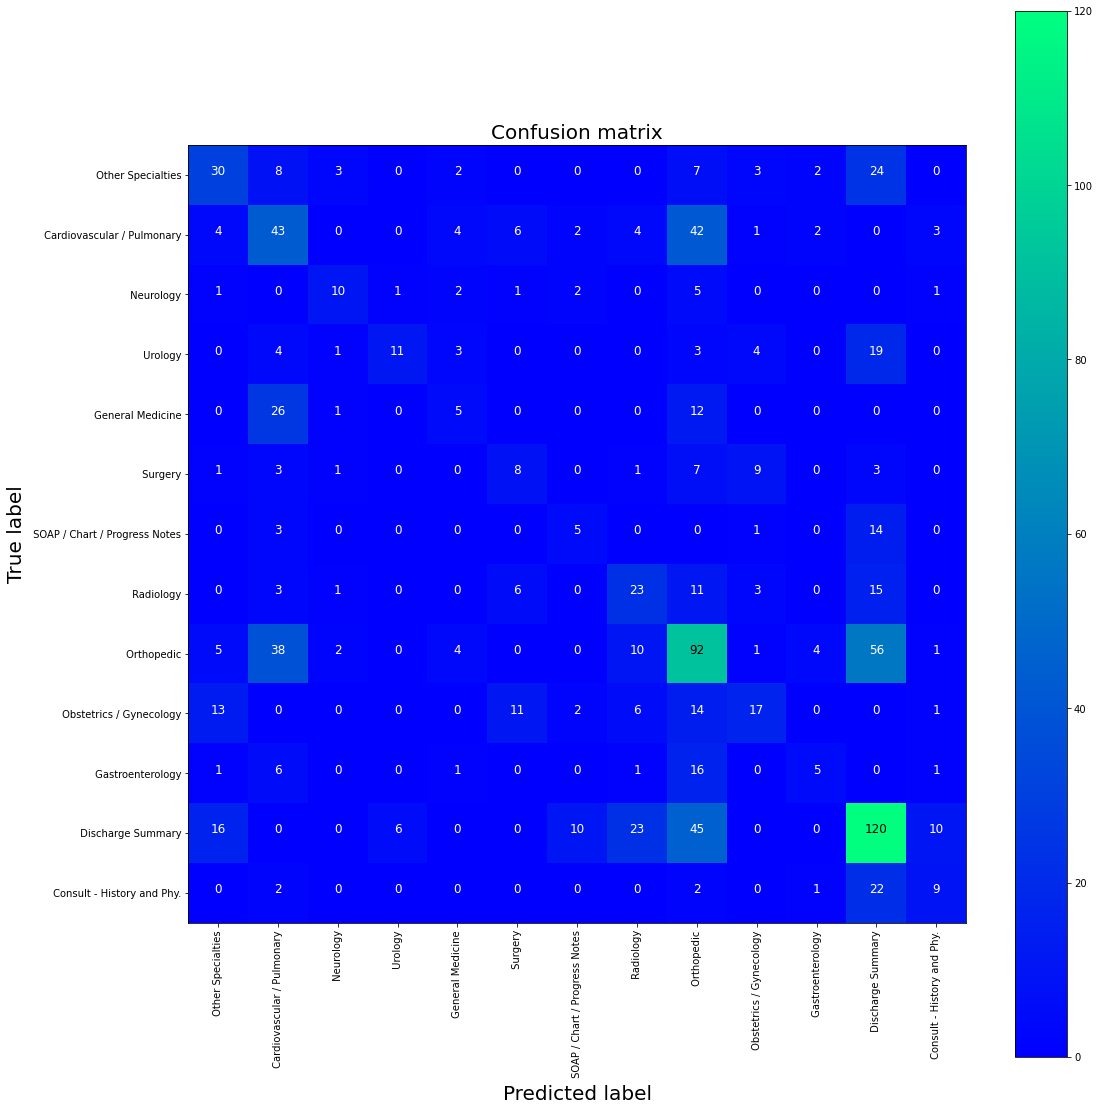

In [84]:
classes = [' Other Specialties', ' Cardiovascular / Pulmonary', ' Neurology',
       ' Urology', ' General Medicine', ' Surgery',
       ' SOAP / Chart / Progress Notes', ' Radiology', ' Orthopedic',
       ' Obstetrics / Gynecology', ' Gastroenterology',
       ' Discharge Summary', ' Consult - History and Phy.']
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(16, 16))
plot = plot_confusion_matrix(cm, classes=classes, normalize=False, 
                             title='Confusion matrix')
plt.show()

In [87]:
from sentence_transformers import SentenceTransformer

AttributeError: module 'tensorflow.python.pywrap_tensorflow' has no attribute 'TFE_DEVICE_PLACEMENT_EXPLICIT'

In [ ]:
model = Sen